In [195]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [196]:
# Load the dataset
file_path_csv = 'MathE dataset (4).csv'  # Path to the dataset
dataset = pd.read_csv(file_path_csv, delimiter=';', encoding='ISO-8859-1')

In [197]:
# Display dataset structure
print("Dataset Head:")
print(dataset.head())
print("\nColumns in Dataset:")
print(dataset.columns)

Dataset Head:
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  

Columns in Dataset:
Index(['Student ID', 'Studen

In [215]:
print(dataset.isnull().sum())

Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64


In [198]:
# Target variable
target = 'Type of Answer'

In [199]:
# Identify categorical and numerical columns
categorical_columns = ['Question Level','Topic']
numerical_columns = ['Student ID']

In [200]:
# ---- Preprocessing ----
# Combine encoded features with numerical columns
# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(dataset[categorical_columns])

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
label_encoded_features = dataset[categorical_columns].apply(label_encoder.fit_transform)

# Min-Max Scaling for numerical variables
min_max_scaler = MinMaxScaler()
min_max_scaled_features = min_max_scaler.fit_transform(dataset[numerical_columns])

# Standard Scaling for numerical variables
standard_scaler = StandardScaler()
standard_scaled_features = standard_scaler.fit_transform(dataset[numerical_columns])

# Combine all features
X = pd.concat([
    pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns)),
    pd.DataFrame(label_encoded_features, columns=[f'{col}_label_encoded' for col in categorical_columns]),
    pd.DataFrame(min_max_scaled_features, columns=[f'{col}_min_max_scaled' for col in numerical_columns]),
    pd.DataFrame(standard_scaled_features, columns=[f'{col}_standard_scaled' for col in numerical_columns])
], axis=1)

# Target variable
y = dataset[target]

In [201]:
from sklearn.decomposition import PCA
# Apply PCA
n_components = 4
pca = PCA(n_components=n_components,random_state=80)
X_pca = pca.fit_transform(X.fillna(0))
# Save the PCA-transformed data
output_file = 'PCA_transformed_dataset.csv'
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
# Corrected: No need to check for 'target_column'
pca_df['target'] = y
pca_df.to_csv(output_file, index=False)

In [202]:
print(f"PCA-transformed data saved to {output_file}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

PCA-transformed data saved to PCA_transformed_dataset.csv
Explained variance ratio: [0.57580493 0.15011678 0.10376884 0.03816815]


In [203]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=80)

In [204]:
from imblearn.over_sampling import SMOTE

# Balance classes in the training set
smote = SMOTE(random_state=20)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [205]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=20),
    'SVM': SVC(random_state=20),
    'KNN': KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean'),
    'Perceptron': Perceptron(max_iter=200, random_state=20),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'AdaBoost': AdaBoostClassifier(random_state=20),
    'GradientBoosting': GradientBoostingClassifier(random_state=20),
    'Bagging': BaggingClassifier(random_state=20),
    'Pasting': BaggingClassifier(random_state=20, bootstrap=False),
    'Random Forest':RandomForestClassifier(random_state=20,max_depth=300,n_estimators=500,criterion='gini',min_samples_split=3,min_samples_leaf=1) 
}

In [206]:
# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

c:\Users\Vinay B R\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [207]:
# Print results
for name, metrics in results.items():
    print(f"{name} - Accuracy: {metrics['Accuracy']:.4f}, F1 Score: {metrics['F1 Score']:.4f}")

Logistic Regression - Accuracy: 0.5141, F1 Score: 0.5148
SVM - Accuracy: 0.5581, F1 Score: 0.5555
KNN - Accuracy: 0.6759, F1 Score: 0.6753
Perceptron - Accuracy: 0.4613, F1 Score: 0.4220
Gaussian Naive Bayes - Accuracy: 0.5288, F1 Score: 0.5143
Bernoulli Naive Bayes - Accuracy: 0.5188, F1 Score: 0.5174
AdaBoost - Accuracy: 0.6079, F1 Score: 0.6086
GradientBoosting - Accuracy: 0.6356, F1 Score: 0.6363
Bagging - Accuracy: 0.6885, F1 Score: 0.6889
Pasting - Accuracy: 0.6822, F1 Score: 0.6823
Random Forest - Accuracy: 0.6932, F1 Score: 0.6937


In [208]:
# Define Base Models:
rf_model = RandomForestClassifier(bootstrap=True,random_state=20,max_depth=300,n_estimators=530,criterion='gini',min_samples_split=2,min_samples_leaf=1)
knn_model = KNeighborsClassifier(n_neighbors=10,weights='distance',metric='euclidean',algorithm='auto')

# Define Meta-model:
meta_model = LogisticRegression(random_state=20,max_iter=200,solver='liblinear')

# Create Stacking Classifier:
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_model),('knn' , knn_model)],
    final_estimator=meta_model,
    passthrough=True
)

In [209]:
stacking_clf.stack_method = 'predict'

In [210]:
# Train the Stacking Classifier:
stacking_clf.fit(X_train_balanced, y_train_balanced)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=300,
                                                       n_estimators=530,
                                                       random_state=20)),
                               ('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=10,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression(max_iter=200,
                                                      random_state=20,
                                                      solver='liblinear'),
                   passthrough=True, stack_method='predict')

In [211]:
# Make Predictions:
y_pred = stacking_clf.predict(X_test) # Predict the target for the test data

In [212]:
# Evaluate the Model:
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacked Model Accuracy: {accuracy*100:.4f}")
f1_score=f1_score(y_test, y_pred, average='weighted')
print(f"Stacked Model F1 Score: {f1_score*100:.4f}")
best_params_stacking=stacking_clf.get_params()
print(f"\nBest Parameters for Stacking Classifier: {best_params_stacking}")
roc_auc_score=roc_auc_score(y_test, y_pred)
print(f"\nROC AUC Score: {roc_auc_score*100:.4f}")
roc_curve=roc_curve(y_test, y_pred)
print(f"\nROC Curve: {roc_curve}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Stacked Model Accuracy: 69.5288
Stacked Model F1 Score: 69.5608

Best Parameters for Stacking Classifier: {'cv': None, 'estimators': [('rf', RandomForestClassifier(max_depth=300, n_estimators=530, random_state=20)), ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance'))], 'final_estimator__C': 1.0, 'final_estimator__class_weight': None, 'final_estimator__dual': False, 'final_estimator__fit_intercept': True, 'final_estimator__intercept_scaling': 1, 'final_estimator__l1_ratio': None, 'final_estimator__max_iter': 200, 'final_estimator__multi_class': 'deprecated', 'final_estimator__n_jobs': None, 'final_estimator__penalty': 'l2', 'final_estimator__random_state': 20, 'final_estimator__solver': 'liblinear', 'final_estimator__tol': 0.0001, 'final_estimator__verbose': 0, 'final_estimator__warm_start': False, 'final_estimator': LogisticRegression(max_iter=200, random_state=20, solver='liblinear'), 'n_jobs': None, 'passthrough': True, 'stack_method': 'predict', 've

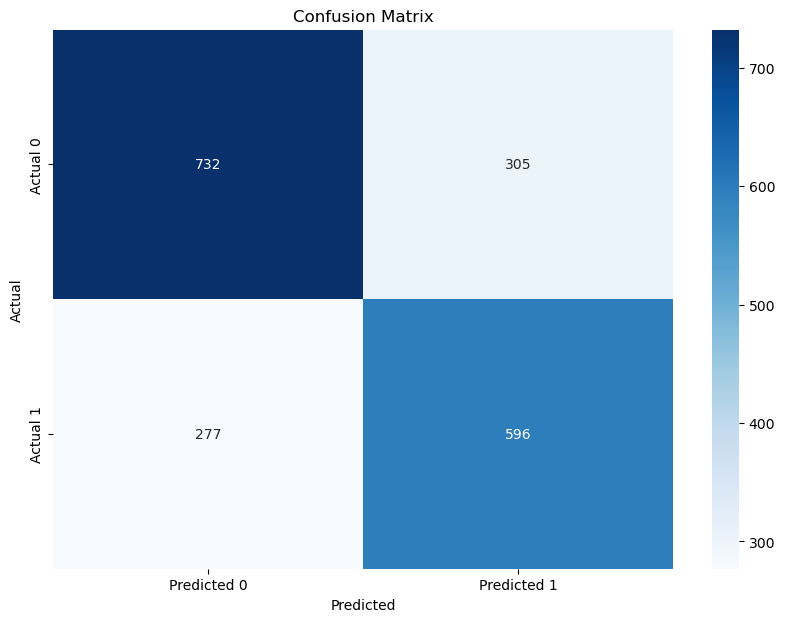

In [213]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()